<a href="https://colab.research.google.com/github/sdesai38/5105_SD/blob/main/Copy_of_SVMHomework4_DesaiShamik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Problem 1)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler as Norm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#loading data set
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
#stadardizing and splitting training and validation
scaler = Norm()
num_vars = features
breast_dataset[num_vars] = scaler.fit_transform(breast_dataset[num_vars])
np.random.seed(0)
df_train, df_test = train_test_split(breast_dataset, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
58,0.287236,0.324653,0.268261,0.162757,0.252505,0.056776,0.001621,0.020711,0.383333,0.106361,...,0.272655,0.198366,0.107870,0.204253,0.033588,0.001474,0.038179,0.172285,0.051489,1.0
554,0.279190,0.649645,0.267501,0.157285,0.258193,0.119195,0.145150,0.116451,0.255556,0.149958,...,0.632196,0.191394,0.100890,0.340289,0.130696,0.194808,0.223127,0.159077,0.113997,1.0
351,0.415022,0.321610,0.437496,0.260912,0.647016,0.665665,0.682755,0.617296,0.664141,0.549073,...,0.323827,0.343593,0.179439,0.553589,0.463089,0.548882,0.733677,0.528287,0.327693,0.0
136,0.223816,0.235374,0.213738,0.118812,0.473684,0.127508,0.084161,0.129225,0.140909,0.199874,...,0.358742,0.178047,0.088847,0.369346,0.073260,0.083546,0.239450,0.028977,0.120622,1.0
497,0.259785,0.257017,0.253334,0.142778,0.330866,0.174591,0.084560,0.117744,0.235354,0.221146,...,0.328358,0.211216,0.103741,0.372647,0.216656,0.161981,0.361856,0.289769,0.141480,1.0


In [ ]:
#Splitting inputs and outputs:
xtrain = df_train.iloc[:,:-1]
ytrain = df_train.iloc[:,-1]

xtrain = xtrain.to_numpy()
ytrain = ytrain.to_numpy()

xtest = df_test.iloc[:,:-1]
ytest = df_test.iloc[:,-1]

xtest = xtest.to_numpy()
ytest = ytest.to_numpy()

In [ ]:
#applying the SVC different kenrels, with regularization:
model_linear = SVC(kernel='linear',C=1.0)
model_poly = SVC(kernel='poly',C=.9)
model_rbf = SVC(kernel='rbf',C=.9)
model_sigmoid = SVC(kernel='sigmoid',C=1.0)

In [ ]:
#training models:
model_linear.fit(xtrain,ytrain)
model_poly.fit(xtrain,ytrain)
model_rbf.fit(xtrain,ytrain)
model_sigmoid.fit(xtrain,ytrain)


Ypred_linear = model_linear.predict(xtest)
Ypred_poly = model_poly.predict(xtest)
Ypred_rbf = model_rbf.predict(xtest)
Ypred_sigmoid = model_sigmoid.predict(xtest)

In [ ]:
#Classification Metrics (Decision Matrix, Precision, Accuracy, F1, Recall)
CM_linear = confusion_matrix(ytest,model_linear.predict(xtest))
CM_poly = confusion_matrix(ytest,model_poly.predict(xtest))
CM_rbf = confusion_matrix(ytest,model_rbf.predict(xtest))
CM_sigmoid = confusion_matrix(ytest,model_sigmoid.predict(xtest))


Metrics_linear = ['Linear',accuracy_score(ytest,Ypred_linear), precision_score(ytest,Ypred_linear), recall_score(ytest,Ypred_linear), f1_score(ytest,Ypred_linear)]
Metrics_poly = ['Poly',accuracy_score(ytest,Ypred_poly), precision_score(ytest,Ypred_poly), recall_score(ytest,Ypred_poly), f1_score(ytest,Ypred_poly)]
Metrics_rbf = ['RBF',accuracy_score(ytest,Ypred_rbf), precision_score(ytest,Ypred_rbf), recall_score(ytest,Ypred_rbf), f1_score(ytest,Ypred_rbf)]
Metrics_sigmoid = ['Sigmoid',accuracy_score(ytest,Ypred_sigmoid), precision_score(ytest,Ypred_sigmoid), recall_score(ytest,Ypred_sigmoid), f1_score(ytest,Ypred_sigmoid)]
'''
print(Metrics_linear)
print(Metrics_poly)
print(Metrics_rbf)
print(Metrics_sigmoid)
'''
labels = ['Kernel','Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
intermediate = np.stack((labels, Metrics_linear,Metrics_poly,Metrics_rbf,Metrics_sigmoid))

final_metrics = pd.DataFrame(intermediate)
final_metrics

,0,1,2,3,4
0,Kernel,Accuracy Score,Precision Score,Recall Score,F1 Score
1,Linear,0.9649122807017544,0.9420289855072463,1.0,0.9701492537313433
2,Poly,0.9736842105263158,0.9558823529411765,1.0,0.9774436090225563
3,RBF,0.9736842105263158,0.9558823529411765,1.0,0.9774436090225563
4,Sigmoid,0.24561403508771928,0.3561643835616438,0.4,0.37681159420289856


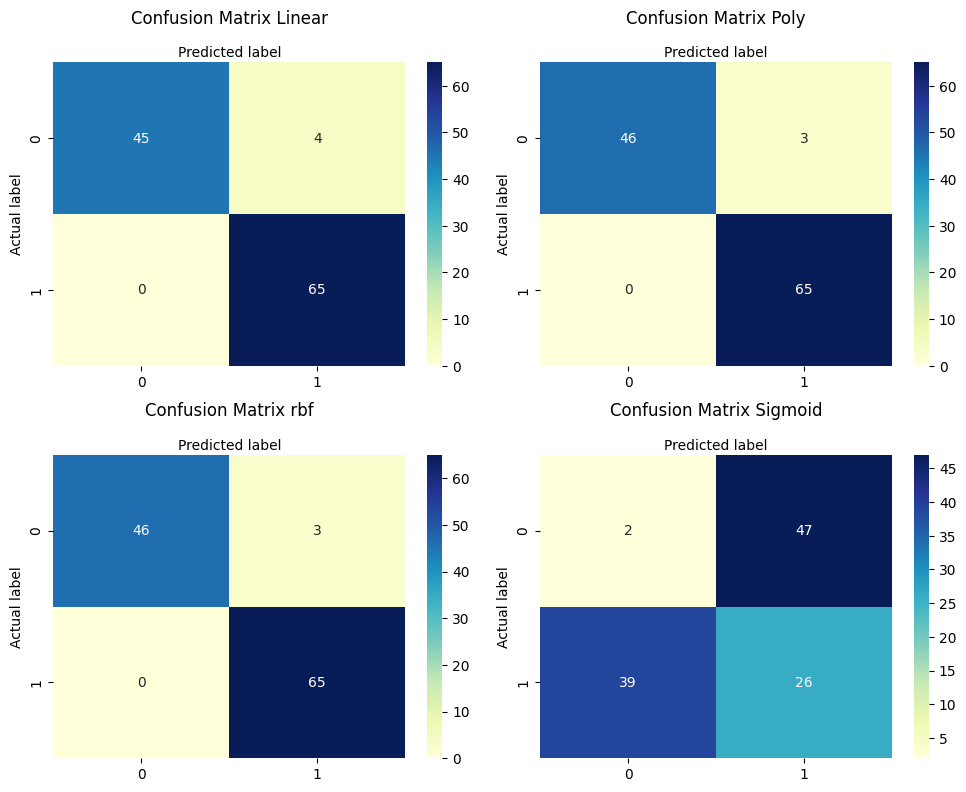

In [ ]:
#Results By Block:

class_names = [0, 1]
tick_marks = np.arange(len(class_names))

# Create one figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjust figsize as needed

# --- Top-left ---
sns.heatmap(pd.DataFrame(CM_linear),
            annot=True, cmap="YlGnBu", fmt='g', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix Linear', y=1.1)
axes[0, 0].set_xticks(tick_marks + 0.5)
axes[0, 0].set_xticklabels(class_names)
axes[0, 0].set_yticks(tick_marks + 0.5)
axes[0, 0].set_yticklabels(class_names)
axes[0, 0].xaxis.set_label_position("top")
axes[0, 0].set_ylabel('Actual label')
axes[0, 0].set_xlabel('Predicted label')

# --- Top-right ---
sns.heatmap(pd.DataFrame(CM_poly),
            annot=True, cmap="YlGnBu", fmt='g', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix Poly', y=1.1)
axes[0, 1].set_xticks(tick_marks + 0.5)
axes[0, 1].set_xticklabels(class_names)
axes[0, 1].set_yticks(tick_marks + 0.5)
axes[0, 1].set_yticklabels(class_names)
axes[0, 1].xaxis.set_label_position("top")
axes[0, 1].set_ylabel('Actual label')
axes[0, 1].set_xlabel('Predicted label')

# --- Bottom-left ---
sns.heatmap(pd.DataFrame(CM_rbf),
            annot=True, cmap="YlGnBu", fmt='g', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix rbf', y=1.1)
axes[1, 0].xaxis.set_label_position("top")
axes[1, 0].set_ylabel('Actual label')
axes[1, 0].set_xlabel('Predicted label')

# --- Bottom-right ---
sns.heatmap(pd.DataFrame(CM_sigmoid),
            annot=True, cmap="YlGnBu", fmt='g', ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix Sigmoid', y=1.1)
axes[1, 1].xaxis.set_label_position("top")
axes[1, 1].set_ylabel('Actual label')
axes[1, 1].set_xlabel('Predicted label')

plt.tight_layout()
plt.show()


In [ ]:
#Problem 2)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler as MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/IntroToMLDataSets/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(filepath))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

dataset = dataset.replace({'yes': 1, 'no': 0,
                           'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0})

# Split into train/test
df_train, df_test = train_test_split(dataset, train_size=0.8, random_state=100)

# Columns to scale
num_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# --- Feature scaling ---
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale training features and target separately
df_train_scaled = df_train.copy()
df_train_scaled[num_vars[1:]] = scaler_X.fit_transform(df_train[num_vars[1:]])
df_train_scaled['price'] = scaler_y.fit_transform(df_train[['price']])

# Scale test features using **training scalers**
df_test_scaled = df_test.copy()
df_test_scaled[num_vars[1:]] = scaler_X.transform(df_test[num_vars[1:]])
df_test_scaled['price'] = scaler_y.transform(df_test[['price']])

/tmp/ipython-input-3123924044.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'yes': 1, 'no': 0,


In [ ]:
xtrain = df_train_scaled.iloc[:, 1:].to_numpy()
ytrain = df_train_scaled['price'].to_numpy().reshape(-1,1)

xtest = df_test_scaled.iloc[:, 1:].to_numpy()
ytest = df_test_scaled['price'].to_numpy().reshape(-1,1)



In [ ]:
regressor_linear = SVR(kernel='linear', C=1.0)
regressor_poly = SVR(kernel='poly', C=1.0)
regressor_rbf = SVR(kernel='rbf', C=1.0)
regressor_sigmoid = SVR(kernel='sigmoid', C=1.0)

model_reg_linear = regressor_linear.fit(xtrain, ytrain)
model_reg_poly = regressor_poly.fit(xtrain, ytrain)
model_reg_rbf = regressor_rbf.fit(xtrain, ytrain)
model_reg_sigmoid = regressor_sigmoid.fit(xtrain, ytrain)
naive_bayes = GaussianNB()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
Ypred_linear = model_reg_linear.predict(xtest)
Ypred_poly = model_reg_poly.predict(xtest)
Ypred_rbf = model_reg_rbf.predict(xtest)
Ypred_sigmoid = model_reg_sigmoid.predict(xtest)

Ypred_linear_scaled  = model_reg_linear.predict(xtest).reshape(-1,1)
Ypred_poly_scaled    = model_reg_poly.predict(xtest).reshape(-1,1)
Ypred_rbf_scaled     = model_reg_rbf.predict(xtest).reshape(-1,1)
Ypred_sigmoid_scaled = model_reg_sigmoid.predict(xtest).reshape(-1,1)

# Inverse-transform to original target scale
Ypred_linear  = scaler_y.inverse_transform(Ypred_linear_scaled)
Ypred_poly    = scaler_y.inverse_transform(Ypred_poly_scaled)
Ypred_rbf     = scaler_y.inverse_transform(Ypred_rbf_scaled)
Ypred_sigmoid = scaler_y.inverse_transform(Ypred_sigmoid_scaled)

# If you also need the original ytest for comparison
ytest = scaler_y.inverse_transform(ytest.reshape(-1,1))


In [ ]:
ytest.shape
xtest.shape

(109, 12)

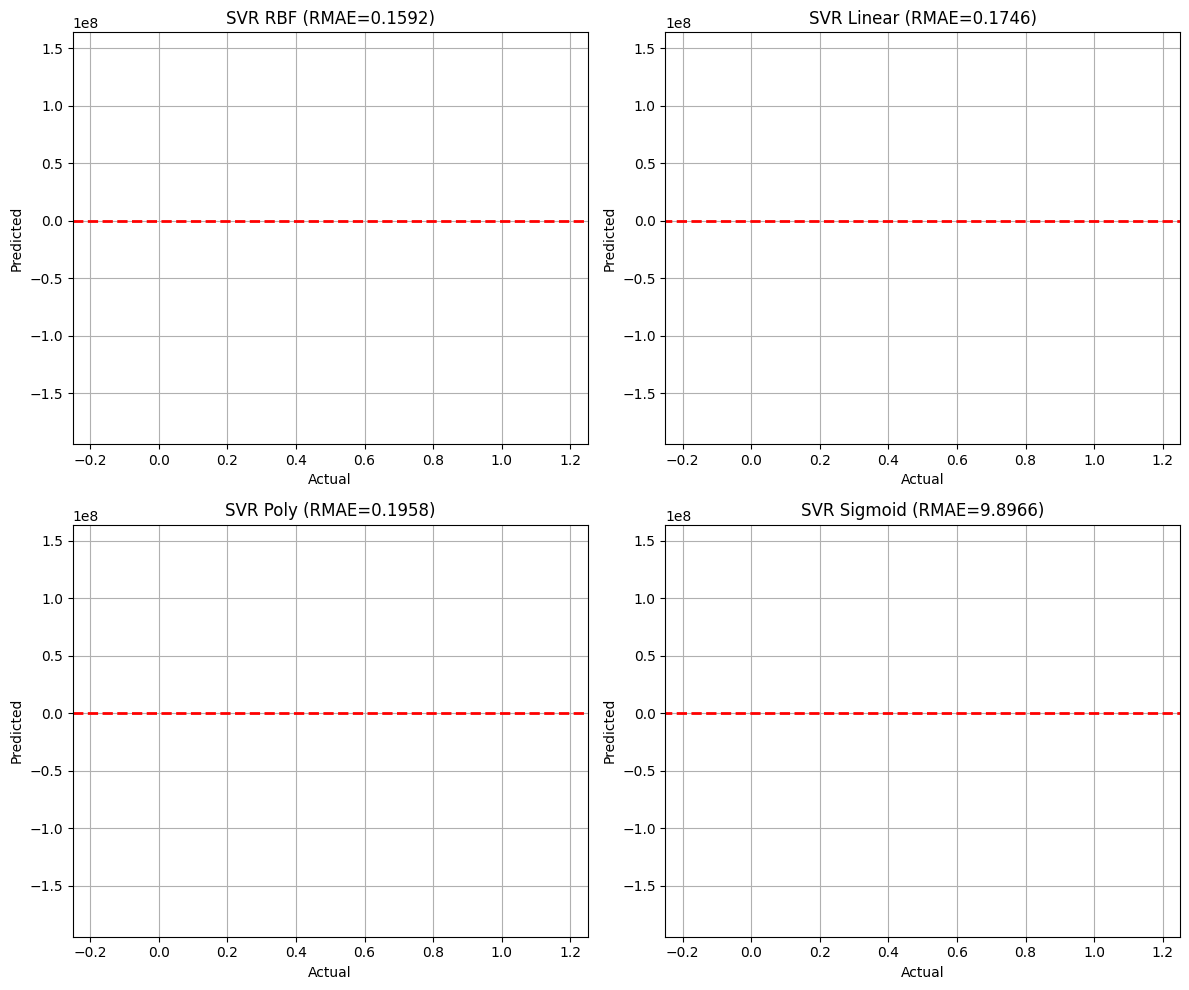

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# --- Compute relative MAE for each kernel ---
rmae_rbf = mean_absolute_error(ytest, Ypred_rbf) / np.mean(ytest)
rmae_lin = mean_absolute_error(ytest, Ypred_linear) / np.mean(ytest)
rmae_poly = mean_absolute_error(ytest, Ypred_poly) / np.mean(ytest)
rmae_sig = mean_absolute_error(ytest, Ypred_sigmoid) / np.mean(ytest)

# --- 2x2 grid setup ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Common limits for consistent comparison
min_val = min(ytest.min(), Ypred_rbf.min(), Ypred_linear.min(), Ypred_poly.min(), Ypred_sigmoid.min())
max_val = max(ytest.max(), Ypred_rbf.max(), Ypred_linear.max(), Ypred_poly.max(), Ypred_sigmoid.max())

# ---- 1. RBF ----
axs[0].scatter(ytest, Ypred_rbf, alpha=0.6, color='tab:blue')
axs[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axs[0].set_title(f"SVR RBF (RMAE={rmae_rbf:.4f})")
axs[0].set_xlim(-.25, 1.25)
#axs[0].set_ylim(-.25, 1.5)
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")
axs[0].grid(True)

# ---- 2. Linear ----
axs[1].scatter(ytest, Ypred_linear, alpha=0.6, color='tab:orange')
axs[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axs[1].set_title(f"SVR Linear (RMAE={rmae_lin:.4f})")
axs[1].set_xlim(-.25, 1.25)
#axs[1].set_ylim(-.25, 1.5)
axs[1].set_xlabel("Actual")
axs[1].set_ylabel("Predicted")
axs[1].grid(True)

# ---- 3. Polynomial ----
axs[2].scatter(ytest, Ypred_poly, alpha=0.6, color='tab:green')
axs[2].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axs[2].set_title(f"SVR Poly (RMAE={rmae_poly:.4f})")
axs[2].set_xlim(-.25, 1.25)
#axs[2].set_ylim(-.25, 1.5)
axs[2].set_xlabel("Actual")
axs[2].set_ylabel("Predicted")
axs[2].grid(True)

# ---- 4. Sigmoid ----
axs[3].scatter(ytest, Ypred_sigmoid, alpha=0.6, color='tab:purple')
axs[3].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axs[3].set_title(f"SVR Sigmoid (RMAE={rmae_sig:.4f})")
axs[3].set_xlim(-.25, 1.25)
axs[3].set_xlabel("Actual")
axs[3].set_ylabel("Predicted")
axs[3].grid(True)

plt.tight_layout()
plt.show()


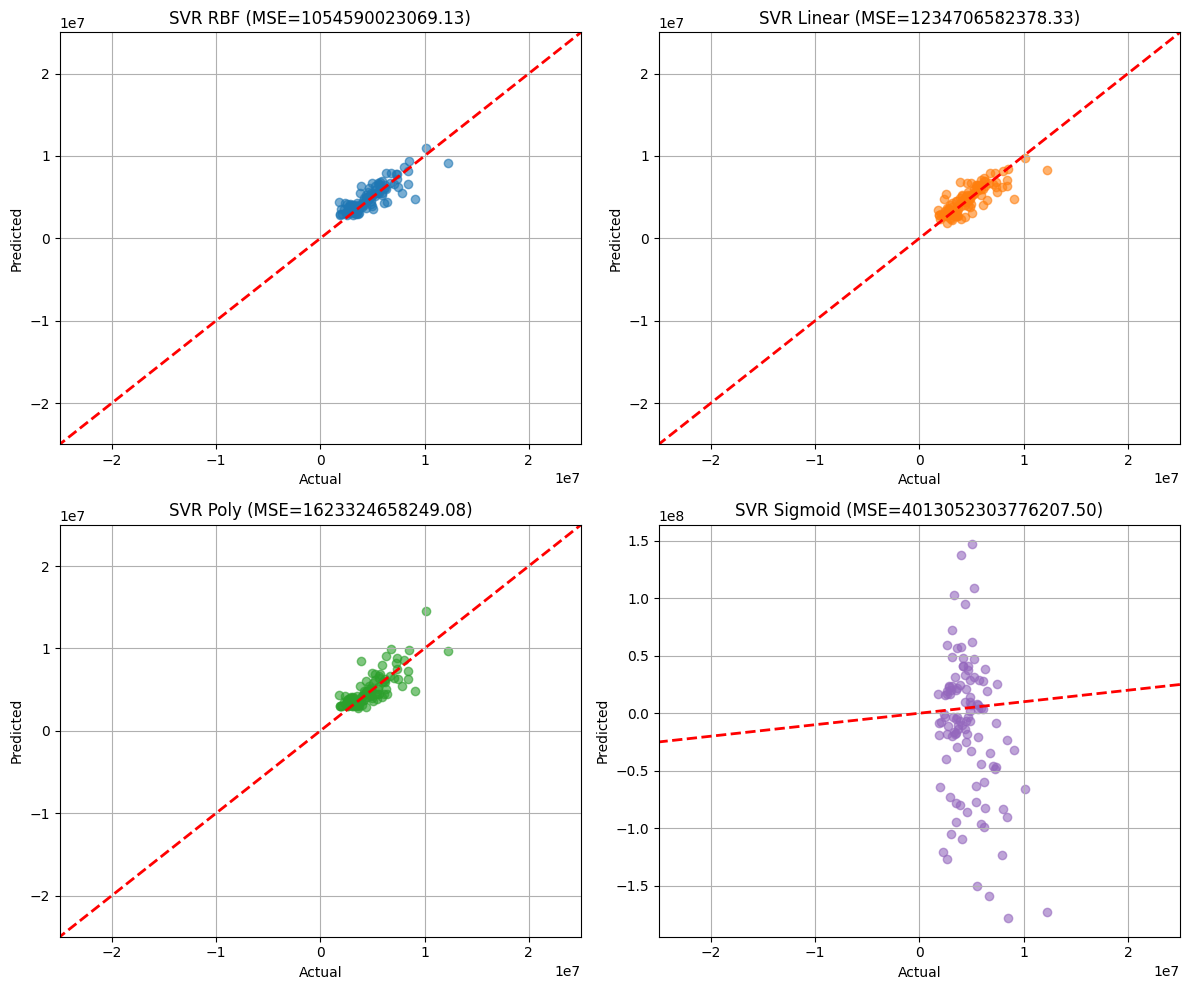

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# --- Compute MSE for each kernel ---
mse_rbf = mean_squared_error(ytest, Ypred_rbf)
mse_lin = mean_squared_error(ytest, Ypred_linear)
mse_poly = mean_squared_error(ytest, Ypred_poly)
mse_sig = mean_squared_error(ytest, Ypred_sigmoid)

# --- 2x2 grid setup ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Common limits for consistent comparison
min_val = min(ytest.min(), Ypred_rbf.min(), Ypred_linear.min(), Ypred_poly.min(), Ypred_sigmoid.min())
max_val = max(ytest.max(), Ypred_rbf.max(), Ypred_linear.max(), Ypred_poly.max(), Ypred_sigmoid.max())

# ---- 1. RBF ----
axs[0].scatter(ytest, Ypred_rbf, alpha=0.6, color='tab:blue')
axs[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axs[0].set_xlim(-.25*10**8, .25*10**8)
axs[0].set_ylim(-.25*10**8, .25*10**8)
axs[0].set_title(f"SVR RBF (MSE={mse_rbf:.2f})")
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")
axs[0].grid(True)

# ---- 2. Linear ----
axs[1].scatter(ytest, Ypred_linear, alpha=0.6, color='tab:orange')
axs[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axs[1].set_xlim(-.25*10**8, .25*10**8)
axs[1].set_ylim(-.25*10**8, .25*10**8)
axs[1].set_title(f"SVR Linear (MSE={mse_lin:.2f})")
axs[1].set_xlabel("Actual")
axs[1].set_ylabel("Predicted")
axs[1].grid(True)

# ---- 3. Polynomial ----
axs[2].scatter(ytest, Ypred_poly, alpha=0.6, color='tab:green')
axs[2].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axs[2].set_xlim(-.25*10**8, .25*10**8)
axs[2].set_ylim(-.25*10**8, .25*10**8)
axs[2].set_title(f"SVR Poly (MSE={mse_poly:.2f})")
axs[2].set_xlabel("Actual")
axs[2].set_ylabel("Predicted")
axs[2].grid(True)

# ---- 4. Sigmoid ----
axs[3].scatter(ytest, Ypred_sigmoid, alpha=0.6, color='tab:purple')
axs[3].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axs[3].set_xlim(-.25*10**8, .25*10**8)
axs[3].set_title(f"SVR Sigmoid (MSE={mse_sig:.2f})")
axs[3].set_xlabel("Actual")
axs[3].set_ylabel("Predicted")
axs[3].grid(True)

plt.tight_layout()
plt.show()
